# 尾巴里的巨人|六十米高的巨人在哪里，让幂律告诉你！

*by Leo*

人类的身高数据是我们生活中常见到的统计数据，但是为什么我们身边常见到的人身高都差不多呢？
我们知道长成像姚明那样的高个子是小概率事件，但是这个概率有多小呢？
让我们通过正态分布，和幂律分布这两种概率分布告诉你答案！

## 目录

<!-- TOC -->

- [人类身高分布的正态分布情况](#人类身高分布的正态分布情况)
- [用幂律拟合人类身高](#用幂律拟合人类身高)
- [尾巴里的巨人（Titan in Tail）](#尾巴里的巨人（Titan in Tail）)
- [所以，到底为啥没有巨人？](#所以，到底为啥没有巨人？)
- [参考资料](#参考资料！)

<!-- /TOC -->

In [1]:
import pandas
import functools
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.optimize import curve_fit

%matplotlib inline

数据来自 [SOCR Data Dinov 020108 HeightsWeights](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) 原始数据提供了 25,000 行的身高和体重数据，这里我们只使用身高数据，并将数据单位从英寸（inch）转换为厘米（cm）

In [2]:
giant3 = 300
giant60 = 6000

data = np.loadtxt("HeightsWeights.txt", delimiter=',')
data = data[:, 1]
data = (data * 2.45).astype(int)
print("Avg: %f\nSTD: %f" % (data.mean(), data.std()))

Avg: 166.084920
STD: 4.667671


我们可以看到人口身高的平均值为 $166 cm$，标准差为 $4.67 cm$

## 人类身高分布的正态分布情况

接下来让我们用传统的正态分布来描绘一下这个数据：

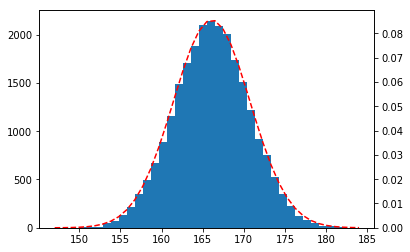

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
n, bins, patches = ax1.hist(data, len(set(data)))
ax2 = ax1.twinx()
y = scipy.stats.norm.pdf(bins, data.mean(), data.std())
ax2.plot(bins, y, 'r--')
ax2.set_ylim(bottom=0)
plt.show()

我们能够看到，人类身高数据能完美拟合正态分布。

在正态分布中有一个非常重要的准则：**三西格马定律**，几乎所有的数据都会落在以均值为中心的三个标准差范围内。现实生活中也确实如此，一米八以上的高个子不多见，一米五以下的矮个子也没那么多。

让我们来估算一下，巨人出现的概率：

In [4]:
def normfun(x,mu,sigma):
    pdf = np.exp(-((x - mu)**2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf

height_pdf = functools.partial(normfun, mu=data.mean(),sigma=data.std())

In [5]:
height_pdf(giant3)

1.5684027661859697e-180

可见出现巨人的概率是极低极低的，三米高的巨人出现的概率为 $1.57*10^{-180}$，小数点后179个零！

In [6]:
height_pdf(giant60)

0.0

而六十米高的巨人，以概率估算根本就不会存在。

按照以上这些用正态分布刻画身高数据的特征而得出的结论都很符合常理。接下来，我们会做一些别出心裁的事情。

## 用幂律拟合人类身高

肯定，会有同学发觉，身高数据两侧下降的曲线，跟中学时学过的幂函数（幂律）也差不多嘛。

![幂函数](Power_function.png)
> 这些都是大家常见的幂函数（幂律）啦！ （图片来源：维基百科）

那么我们就来试试用指数为负的幂函数（中间那种类型的幂函数）拟合一下身高数据的分布情况，首先，根据幂函数的特点我们对数据做一些假设和处理：假设人口中身高为平均值的人数是最多的，大多数人的身高相对平均值的**差值**不会太大，与平均身高相差很大的数据很少。  

这样，我们就能用**身高数据和均值的差值**的分布情况来刻画人类身高分布情况：  
（注：在实际数据处理中包含了一些技巧性的方法，请参看源代码。）

In [7]:
bias_data = np.abs(data - int(data.mean()))
bias_data = bias_data[bias_data != 0]

In [8]:
d = dict(Counter(bias_data))
x = list(set(bias_data))
y = [d[_] / len(bias_data) for _ in x]
x = [_ + 0.5 for _ in x]

In [9]:
def power_func(x, a, b):
    return a * (x ** b)

In [10]:
popt, pcov = curve_fit(power_func, x, y)
a_hat, b_hat = popt[0], popt[1]

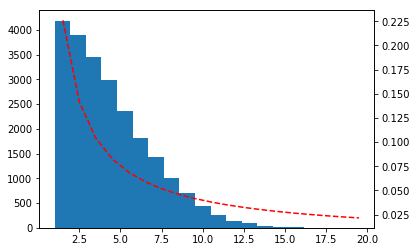

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
_ = plt.hist(bias_data, len(set(bias_data)))
ax2 = ax1.twinx()
y_hat = [power_func(_, a_hat, b_hat) for _ in x]
ax2.plot(x,y_hat,'r--') 
plt.show()

如图所示，图中的横轴代表**身高数据和均值的差值**从左到右差值依次增大，显然与均值相差较大的数据确实不多。按照幂律分布拟合出来的结果，虽然不如正态分布那么贴切，但似乎也能表达出数据变化的趋势。不过让我们看一些估计的实例。

In [12]:
height_pdf_power = functools.partial(power_func, a=a_hat,b=b_hat)

In [13]:
height_pdf_power(giant3-data.mean())

0.0037069008645622733

身高三米的巨人出现的概率为 0.37%，接近**千分之四**！！！，是不是有点不对了。。。再接着看!

In [14]:
height_pdf_power(giant60-data.mean())

0.0001172085859924503

**六十米高的巨人出现的概率也要高于万分之一！！！**  
**六十米高的巨人出现的概率也要高于万分之一！！！**  
**六十米高的巨人出现的概率也要高于万分之一！！！**  
这意味着，两千万人口的北京有可能出现两千多个巨人……

![进击的巨人](Attack_on_Titan.jpg)
> 那一天，人类终于回想起了，曾经一度被他们所支配的恐怖，还有被囚禁于鸟笼中的那份屈辱。（图片来源：维基百科）

## 尾巴里的巨人（Titan in Tail）

好了你知道这是不可能的。  
但是为什么用幂律分布去刻画身高数据时，**在幂律尾巴中的那些小概率出现的频率似乎蛮高的？**  
或者说，为什么“巨人”会隐藏在幂律长长的尾巴里呢？  
这是因为和正态分布的**三西格马定律**不同，幂律分布存在**肥尾效应（Fat tail）**。幂律的长尾巴和正态分布相比要胖一些，要高一些，或者跟确切的说函数值要大一些。  
那么，什么是肥尾效应效应呢？为何巨人藏身于“肥尾”中这一切会在**[复杂系统中的幂律分布](https://campus.swarma.org/gpac=394)**课程中为你答疑解惑。

## 所以，到底为啥没有巨人？

你现在还不太满意，因为你会想：**到底为啥就没有巨人呢？**  
嘿嘿，这和**规模法则**：一个指数为 3/4 的幂律有关。是的，幂律还能告诉你生物生长的约束与限制，因为受到幂律的约束与限制那种六十米高的巨人根本就不会存在。
同样的，规模法则也会在**[复杂系统中的幂律分布](https://campus.swarma.org/gpac=394)**课程中进一步的展开讲解。

## 参考资料

http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights  
http://www.dangreller.com/thats-just-not-normal-power-laws/  
http://mathworld.wolfram.com/LeastSquaresFittingPowerLaw.html  
https://en.wikipedia.org/wiki/Power_law  
http://tuvalu.santafe.edu/~aaronc/powerlaws/  
https://www.zhihu.com/question/20313934  
RANK−1/2: A SIMPLE WAY TO IMPROVE THE OLS ESTIMATION OF TAIL EXPONENTS  
规模：复杂世界的简单法则 杰弗里·韦斯特 (Geoffrey West)